# **ĐỒ ÁN TRỰC QUAN HÓA DỮ LIỆU**
**Môn học:** Trực quan hóa dữ liệu <br>
**Thành viên:** <br>
- Phùng Siêu Đạt - 21127243 <br>
- Đặng Hà Huy - 21127296

## **Mục lục**


* [I. Data understading](#c1)
  * [1. Đếm số dòng và số cột](#c11)
  * [2. Viết bảng mô tả về các cột](#c12)
  * [3. Lấy 5 điểm dữ liệu ra làm mẫu](#c13)
  * [4. Phân tích tỷ lệ missing rate](#c14)
  * [5. Phân tích tỷ lệ duplicate](#c15)
  * [6.Fill missing rate](#c16)
* [II. EDA 1D](#c2)
  * [1. Chia loại dữ liệu num hoặc cate](#c21)
  * [2. Phân tích tỷ lệ đó với biến cate](#c22)
  * [3. Phân tích phân phối đối biến num](#c23)
* [III. EDA 2D](#c3)
  * [1. Phân tích hệ số tương quan giữa các biến num](#c31)
  * [2. Sử dụng Scatter plot để phân tích dữ liệu 2D](#c32)
  * [3. Sử dụng bar chart để phân tích dữ liệu num và cate](#c33)
  * [4. Tính tỷ trọng đối với hai biến cate](#c34)
* [IV. EDA 3D](#c4)
  * [1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num](#c41)
  * [2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate](#c42)
  * [3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate](#c43)
* [V. Insight](#c5)

## **I. Data understanding** <a class="anchor" id="c1"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/hotel_bookings.csv")

### **1. Đếm số dòng và số cột** <a class="anchor" id="c11"></a>

In [4]:
print("Number of Rows: ", len(df.axes[0]))
print("Number of Columns: ", len(df.axes[1]))

Number of Rows:  119390
Number of Columns:  32


### **2. Viết bảng mô tả về các cột** <a class="anchor" id="c12"></a>

* **hotel**: Tên khách sạn (gồn City Hotel và Resort Hotel)
* **is_canceled**: Có hủy hay không (0 chưa hủy 1 đã hủy)
* **lead_time**: Số ngày tính từ ngày đặt phòng đến ngày nhận phòng
* **arrival_date_year**: Năm nhận phòng
* **arrival_date_month**: Tháng nhận phòng
* **arrival_date_week_number**: Tuần trong năm nhận phòng (1 đến 53)
* **arrival_date_day_of_month**: Ngày nhận phòng trong tháng (1 đến 31)
* **stays_in_weekend_nights**: Số đêm cuối tuần (thứ Bảy và Chủ Nhật) mà khách hàng đã đặt
* **stays_in_week_nights**: Số đêm trong tuần (thứ Hai đến thứ Sáu) mà khách hàng đã đặt
* **adults**: Số người lớn
* **childrens**: Số trẻ em
* **babies**: Số em bé
* **meal**: Loại bữa ăn đã đặt được phân loại bằng các gói bữa ăn khách sạn tiêu chuẩn gồm
    * BB (Bed & Breakfast): Bữa sáng được tính chung vào giá phòng
    * HB (Half Board): Bữa sáng và bữa tối được tính chung vào giá phòng
    * FB (Full Board): Cả ba bữa ăn (sáng, trưa và tối) được tính chung vào giá phòng
    * Undefined/SC: không đặt bữa ăn nào
* **country**: Quốc tịch của khách hàng (được biểu diễn dưới dạng ISO 3155–3:2013 format)
* **market_segment**: Phân khúc thị trường
    * TA (Travel Agent): Đại lý du lịch
    * TO (Tour Operators): Nhà điều hành tour
* **distribution_channel**: Kênh phân phối đặt phòng
* **is_repeated_guest**: Là khách quen (0 là khách hàng lần đầu 1 là khách hàng đã đến nhiều lần)
* **previous_cancellations**: Số lượng hủy phòng của khách hàng trước khi đặt phòng hiện tại
* **previous_bookings_not_canceled**: Số lượng phòng khách hàng đã đặt mà không hủy trước khi đặt phòng hiện tại
* **reserved_room_type**: Mã loại phòng đã đặt trước
* **assigned_room_type**: Mã loại phòng được dành cho khách hàng
* **booking_changes**: Số lần thay đổi phòng chi tiết đặt phòng trước khi nhận phòng
* **deposit_type**: Loại hình thanh toán
    * No Deposit: Khách hàng chưa đặt cọc
    * Non Refund: Số tiền đặt cọc bằng với tổng số tiền của phòng
    * Refundable: Số tiền đặt cọc thấp hơn so với tổng số tiền của phòng
* **agent**: Mã ID của đại lý du lịch đã đặt chỗ
* **company**: Mã ID của công ty du lịch đã đặt chỗ hoặc chịu trách nhiệm thanh toán
* **days_in_waiting_list**: Số ngày trong danh sách chờ của lượt đặt phòng trước khi được xác nhận
* **customer_type**: Loại khách hàng
    * Contract: Khi lượt đặt phòng có liên quan đến các hợp đồng khác
    * Group: Khi lượt đặt phòng có liên quan đến một nhóm người
    * Transient: Khi lượt đặt phòng không liên quan đến hợp đồng, một nhóm người và không liên quan đến đăng ký tạm thời khác
    * Transient-party: Khi lượt đặt phòng là tạm thời nhưng được liên kết với ít nhất các lượt đăng ký tạm thời khác
* **adr**: (Average Daily Rate) Giá trung bình hằng ngày được tính bằng cách chia tổng tất cả các giao dịch lưu trú cho tổng số đêm lưu trú
* **required_car_parking_spaces**: Số lượng chỗ đậu xe mà khách hàng yêu cầu
* **total_of_special_requests**: Số lượng những yêu cầu đặt biệt của khách hàng
* **reservation_status**: Tình trạng của phòng được đặt
    * Canceled: Việc đặt chỗ đã bị khách hàng hủy
    * Check-Out: Khách hàng đã nhận và trả phòng
    * No-Show: Khách hàng không nhận phòng và đã có thông báo trước
* **reservation_status_date**: Ngày mà tình trạng của phòng được đặt bị sửa đổi lần cuối cùng

### **3. Lấy 5 điểm dữ liệu ra làm mẫu** <a class="anchor" id="c13"></a>

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### **4. Phân tích tỷ lệ missing rate** <a class="anchor" id="c14"></a>

In [6]:
df.isnull().sum()/len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

### **5. Phân tích tỷ lệ duplicate** <a class="anchor" id="c15"></a>

In [7]:
print("Duplicate rate:", (1 - len(df.drop_duplicates())/len(df)))

Duplicate rate: 0.26797889270458164


Drop những dòng dữ liệu bị lặp lại

In [8]:
df = df.drop_duplicates()

### **6. Fill missing rate** <a class="anchor" id="c16"></a>

In [9]:
df = df.fillna(-1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

## **II. EDA 1D** <a class="anchor" id="c2"></a>

### **1. Chia loại dữ liệu num hoặc cate** <a class="anchor" id="c21"></a>

In [11]:
num_list = list(df.dtypes[df.dtypes != 'object'].index)
print("There are", len(num_list), "num columns")

There are 20 num columns


In [12]:
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
print("There are", len(cate_list), "cate columns")

There are 12 cate columns


### **Num**

In [13]:
for i in range(len(num_list)):
    print(df[num_list[i]].value_counts(normalize=True))
    print("\n")

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64


lead_time
0      0.068401
1      0.036798
2      0.022049
3      0.019497
4      0.017964
         ...   
410    0.000011
411    0.000011
371    0.000011
532    0.000011
463    0.000011
Name: proportion, Length: 479, dtype: float64


arrival_date_year
2016    0.485045
2017    0.362625
2015    0.152330
Name: proportion, dtype: float64


arrival_date_week_number
33    0.031958
34    0.028502
32    0.028022
28    0.026820
30    0.026717
31    0.026168
29    0.025138
27    0.024784
35    0.024086
18    0.023903
21    0.023388
15    0.022758
17    0.021488
23    0.021420
20    0.021088
13    0.020802
19    0.020745
25    0.020436
22    0.020058
24    0.019978
26    0.019898
16    0.019875
14    0.019372
41    0.019028
11    0.018971
38    0.018708
7     0.018651
10    0.018651
36    0.018605
43    0.018365
39    0.018193
9     0.018067
12    0.017999
44    0.017735
8     0.017449
37    0.016866
42    0.016534
40    0

In [14]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [15]:
for i in range(len(num_list)):  
    print(df[num_list[i]].describe(percentiles=percentiles))

count   87,396.000000
mean         0.274898
std          0.446466
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
15%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
35%          0.000000
40%          0.000000
45%          0.000000
50%          0.000000
55%          0.000000
60%          0.000000
65%          0.000000
70%          0.000000
75%          1.000000
80%          1.000000
85%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: is_canceled, dtype: float64
count   87,396.000000
mean        79.891368
std         86.052325
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
15%          4.000000
20%          7.000000
25%         11.000000
30%         17.000000
35%         23.000000
40%         31.000000
45%         39.000000
50%         49.000000
55%         61.000000
60%         73.000000
65%         88.00000

### **2. Phân tích tỷ lệ đó với biến cate** <a class="anchor" id="c22"></a>

In [16]:
for i in range(len(cate_list)):
    print(df[cate_list[i]].value_counts(normalize=True))
    print("\n")

hotel
City Hotel     0.611332
Resort Hotel   0.388668
Name: proportion, dtype: float64


arrival_date_month
August      0.128805
July        0.115074
May         0.095599
April       0.090485
June        0.088848
March       0.085965
October     0.079340
September   0.076548
February    0.069774
December    0.058710
November    0.057154
January     0.053698
Name: proportion, dtype: float64


meal
BB          0.777816
SC          0.108483
HB          0.103952
Undefined   0.005630
FB          0.004119
Name: proportion, dtype: float64


country
PRT   0.314122
GBR   0.119376
FRA   0.101114
ESP   0.082979
DEU   0.061639
        ...   
MMR   0.000011
BFA   0.000011
CYM   0.000011
MLI   0.000011
KHM   0.000011
Name: proportion, Length: 178, dtype: float64


market_segment
Online TA       0.590622
Offline TA/TO   0.158920
Direct          0.135063
Groups          0.056547
Corporate       0.048194
Complementary   0.008032
Aviation        0.002597
Undefined       0.000023
Name: proportion, dtype:

### **3. Phân tích phân phối đối biến num** <a class="anchor" id="c23"></a>

Cột num đầu tiên mang ý nghĩa quyết định đến tập dữ liệu

<Axes: xlabel='is_canceled', ylabel='Count'>

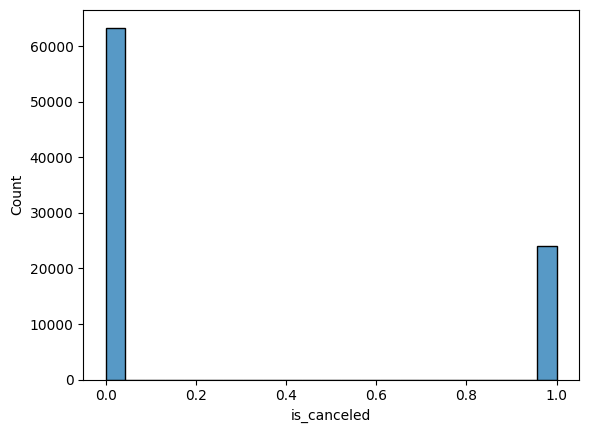

In [17]:
sns.histplot(df[num_list[0]])

6 cột kế tiếp có độ đa dạng dữ liệu cao

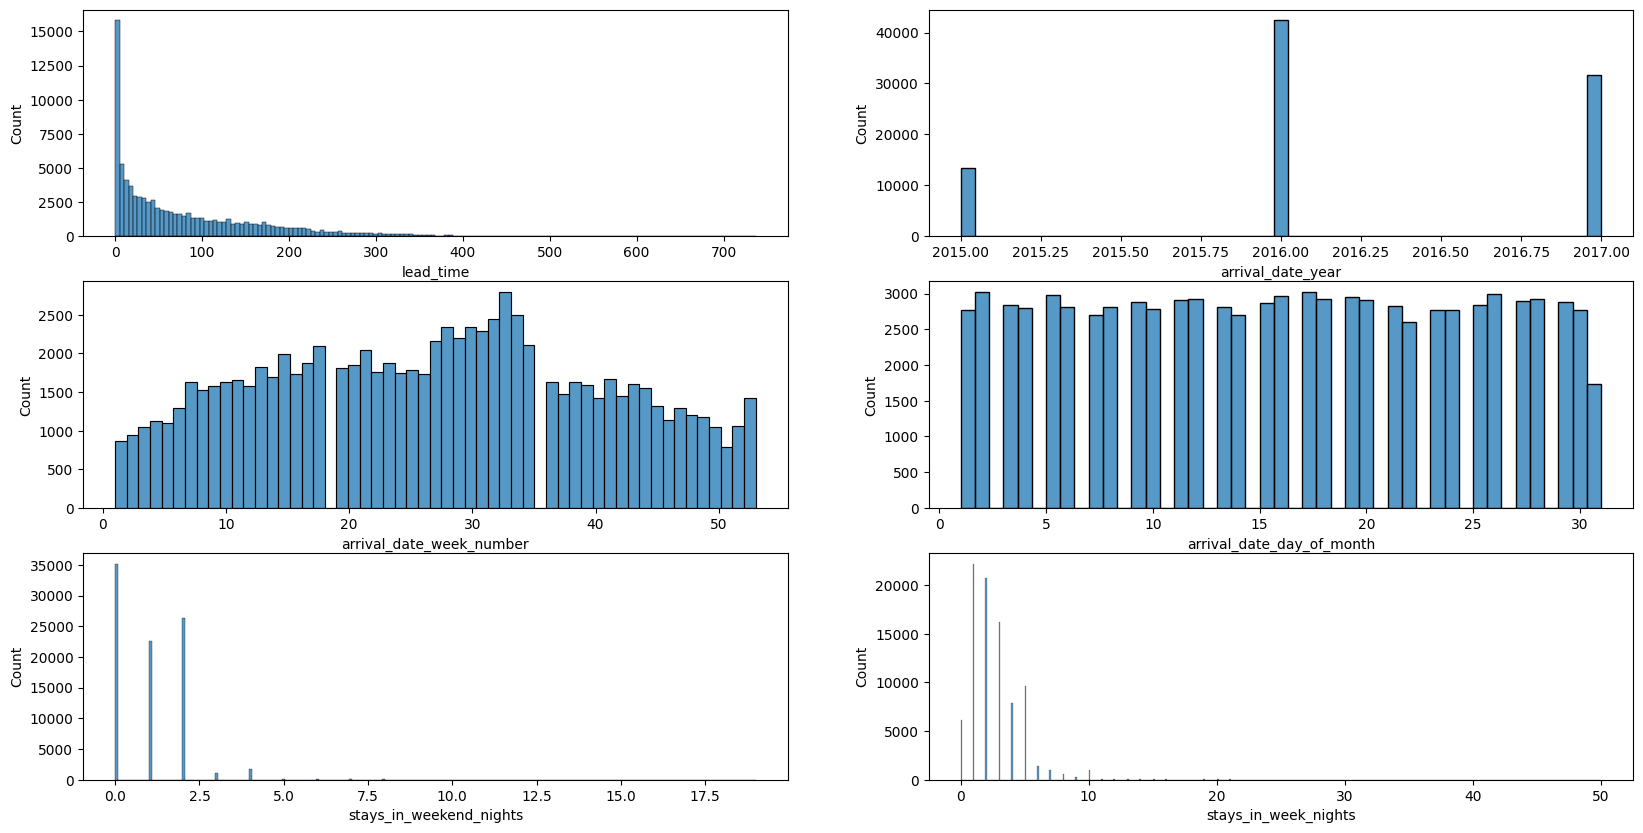

In [18]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(1,7):
    plt.subplot(3,2,i)
    ax = sns.histplot(df[num_list[i]])

6 cột kế tiếp chỉ có dữ liệu ở một số giá trị nhất định

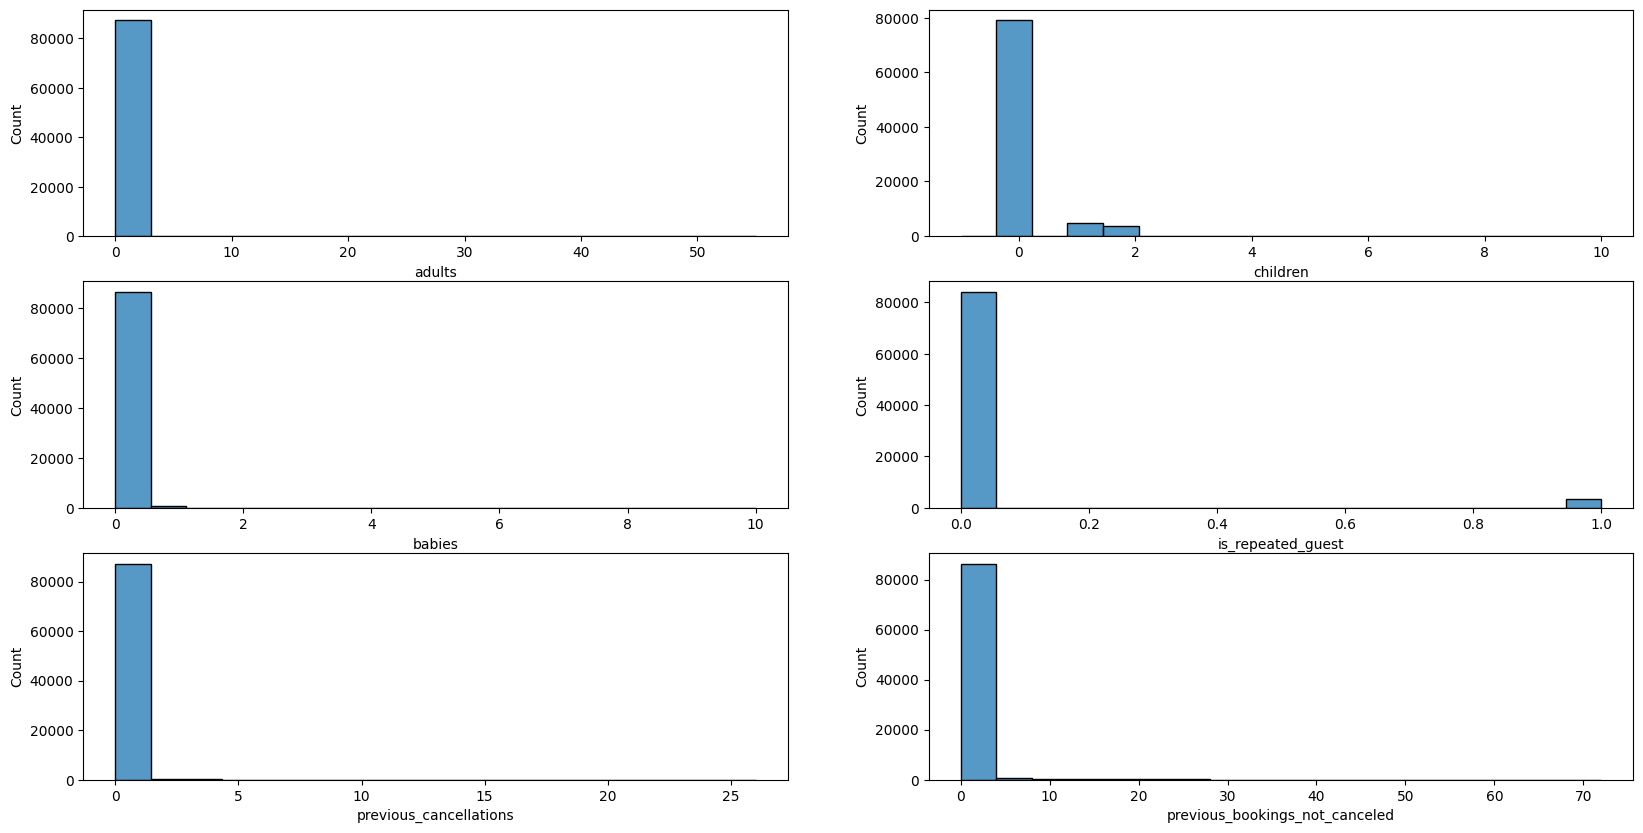

In [19]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(7, 13):
    plt.subplot(3,2,i-6)
    ax = sns.histplot(df[num_list[i]])

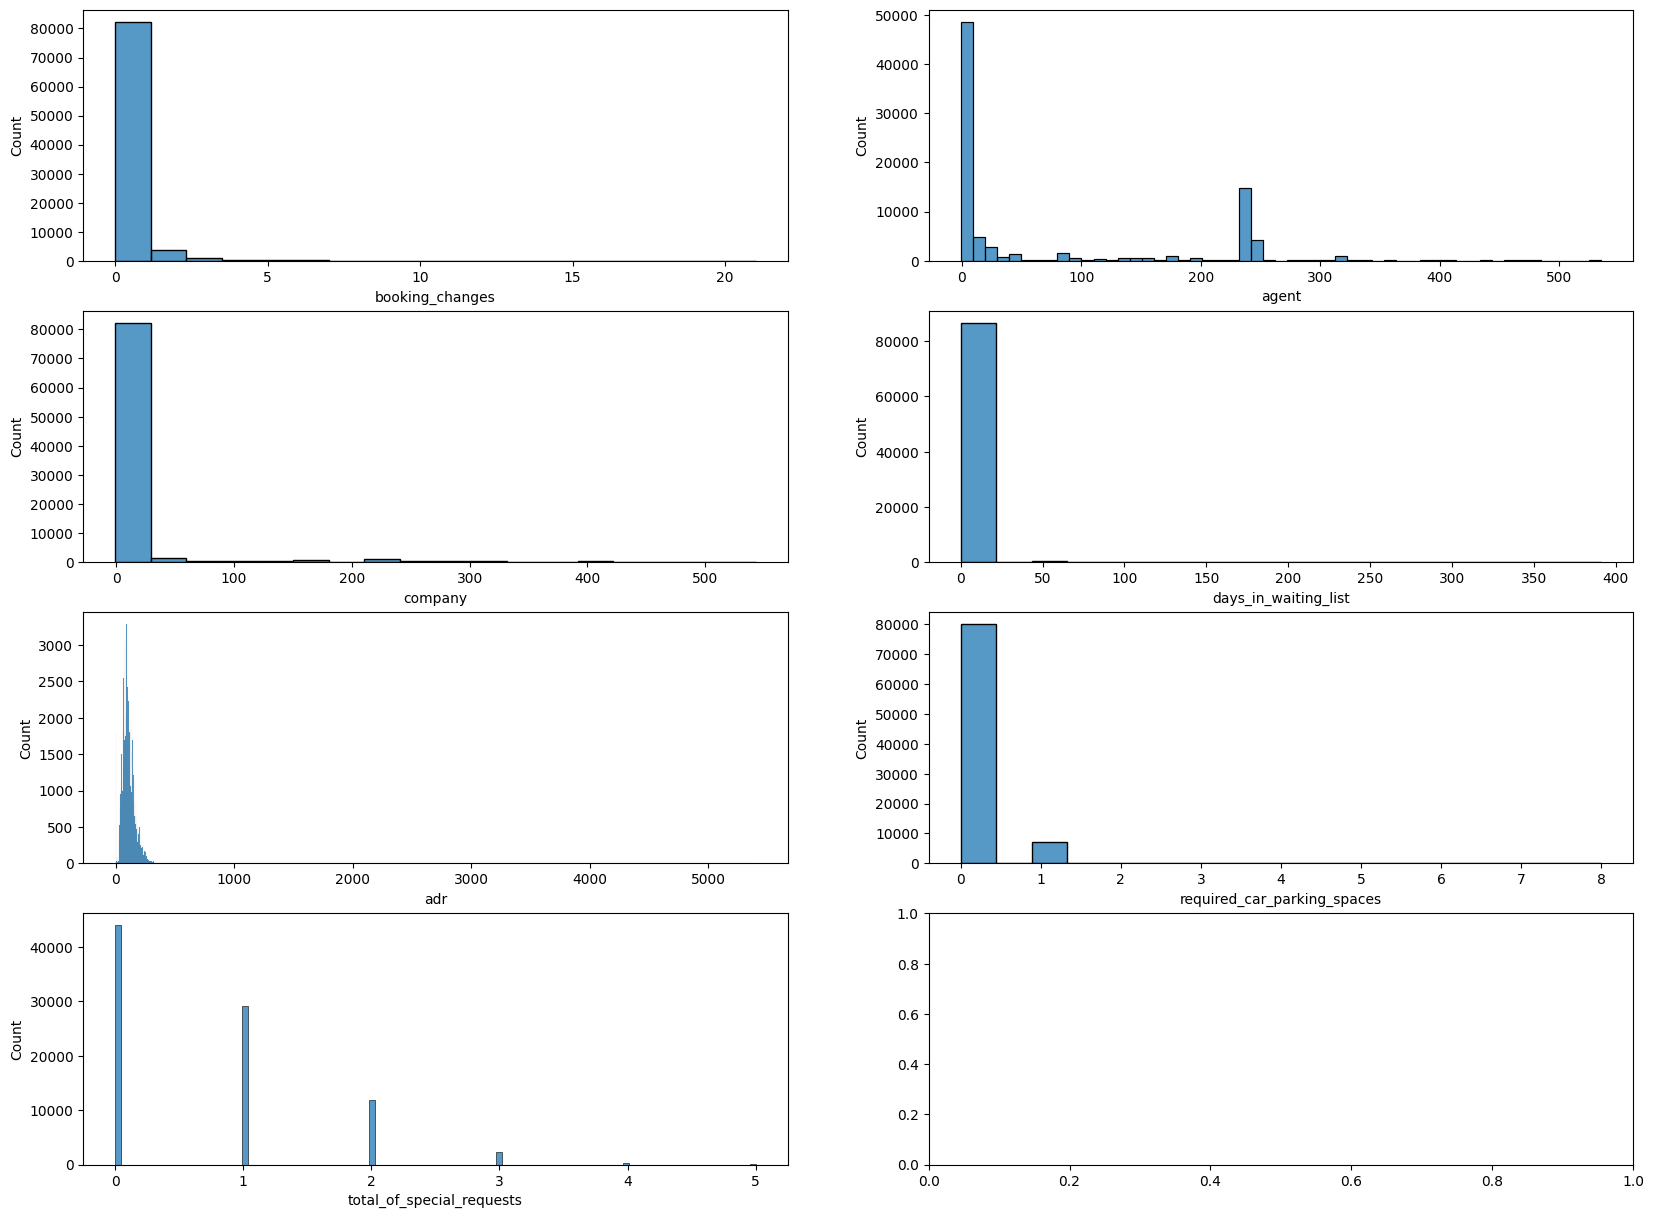

In [20]:
fig = plt.subplots(nrows=4,ncols=2,figsize=(20,15))
for i in range(13, 20):
    plt.subplot(4,2,i-12)
    ax = sns.histplot(df[num_list[i]])

## **III. EDA 2D** <a class="anchor" id="c3"></a>

### **1. Phân tích hệ số tương quan giữa các biến num** <a class="anchor" id="c31"></a>

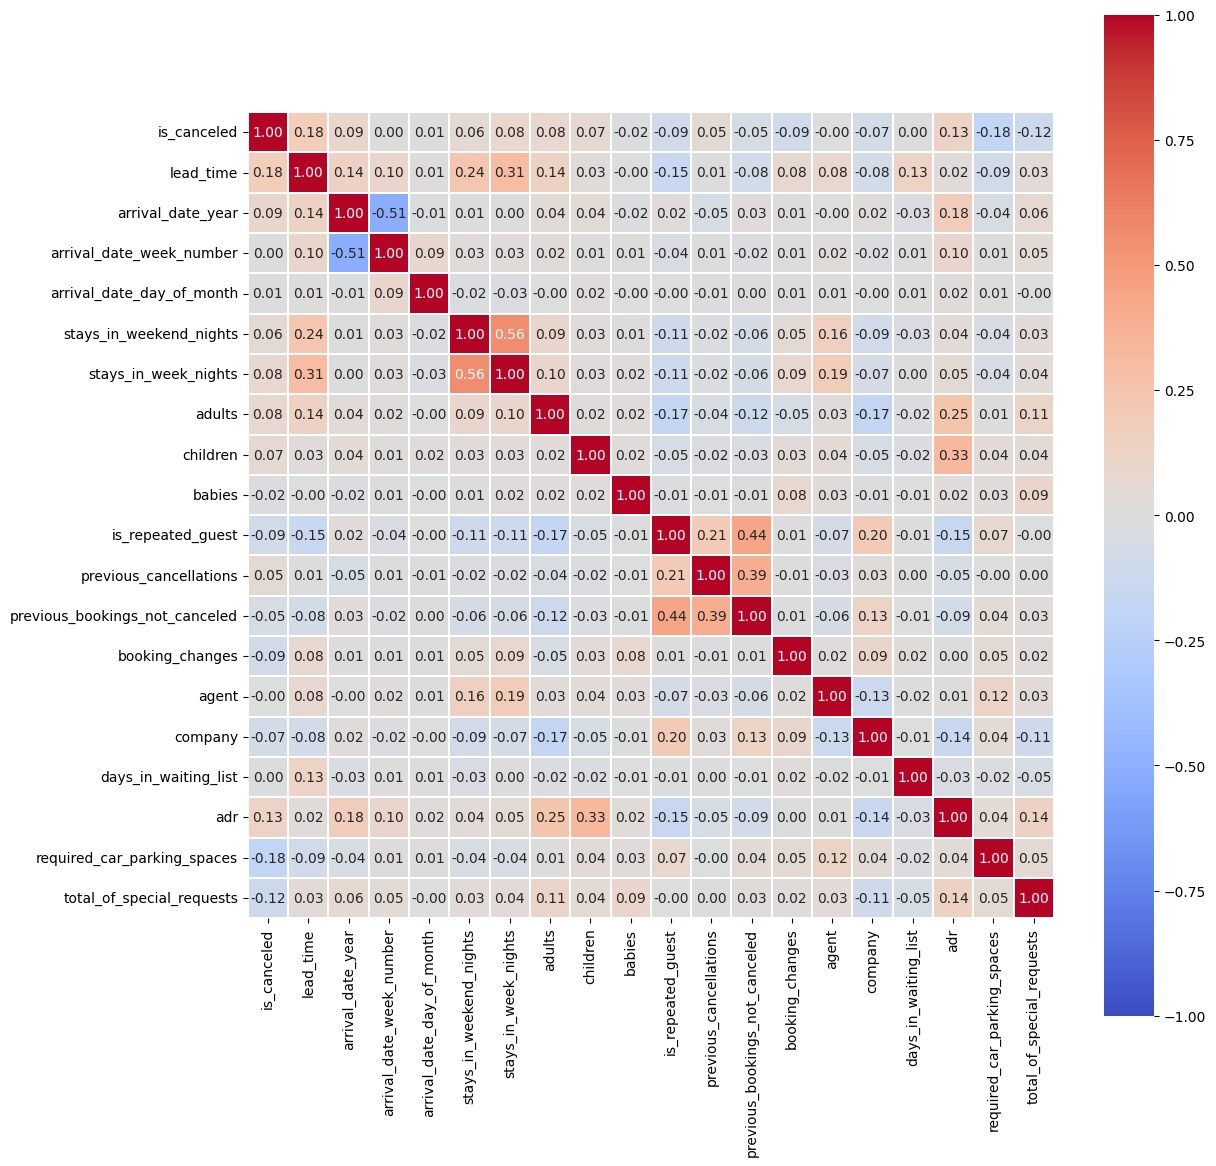

In [21]:
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(df[num_list].corr(), annot=True, cmap="coolwarm", linewidths=.1, fmt=".2f", square=True, vmin=-1)

Dựa vào heatmap trên ta có thể thấy được một vài điểm quan trọng như:  
- **stay_in_week_nights** có độ tương quan lớn với **stay_in_weekend_nights** có vẻ như nếu khách hàng đã lựa chọn ở qua đêm tại khách sạn vào những đêm trong tuần thì họ cũng sẽ có xu hướng ở qua đêm tại khách sạn vào những đêm cuối tuần  
- **adr** và **children** có độ tương quan lớn với nhau nên ta có thể suy đoán rằng số lượng trẻ em sẽ ảnh hưởng đến chi tiêu của khách hàng  
- **previous_bookings_not_cancel** có độ tương quan cao với **is_repeated_guest** cho ta thấy rằng những khách hàng quen thuộc thì có xu hướng hủy những lịc trình khác hơn so với những khách hàng lần đầu  
- **arrival_date_week_number** và **arrival_day_year** có độ tương quan thấp nhất thể hiện rằng năm nhận phòng gần như không hề có ảnh hưởng gì đến với quyết định khách hàng nhận phòng vào tuần nào trong năm đó

### **2. Sử dụng Scatter plot để phân tích dữ liệu 2D** <a class="anchor" id="c32"></a>

#### **Tương quan giữa previous_cancellations và previous_bookings_not_canceled**

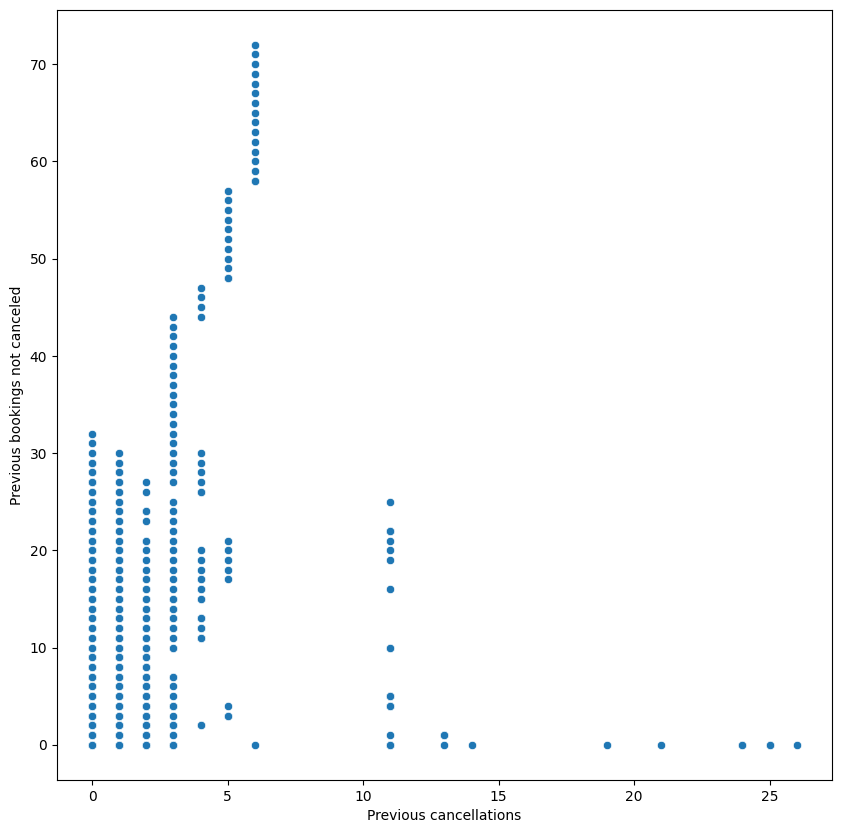

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations')
plt.ylabel('Previous bookings not canceled')
plt.show()

#### **Kết luận**
**Previous cancellations và Previous bookings not canceled có tương quan thuận với nhau**

#### **Tương quan giữa lead_times và booking_changes**  

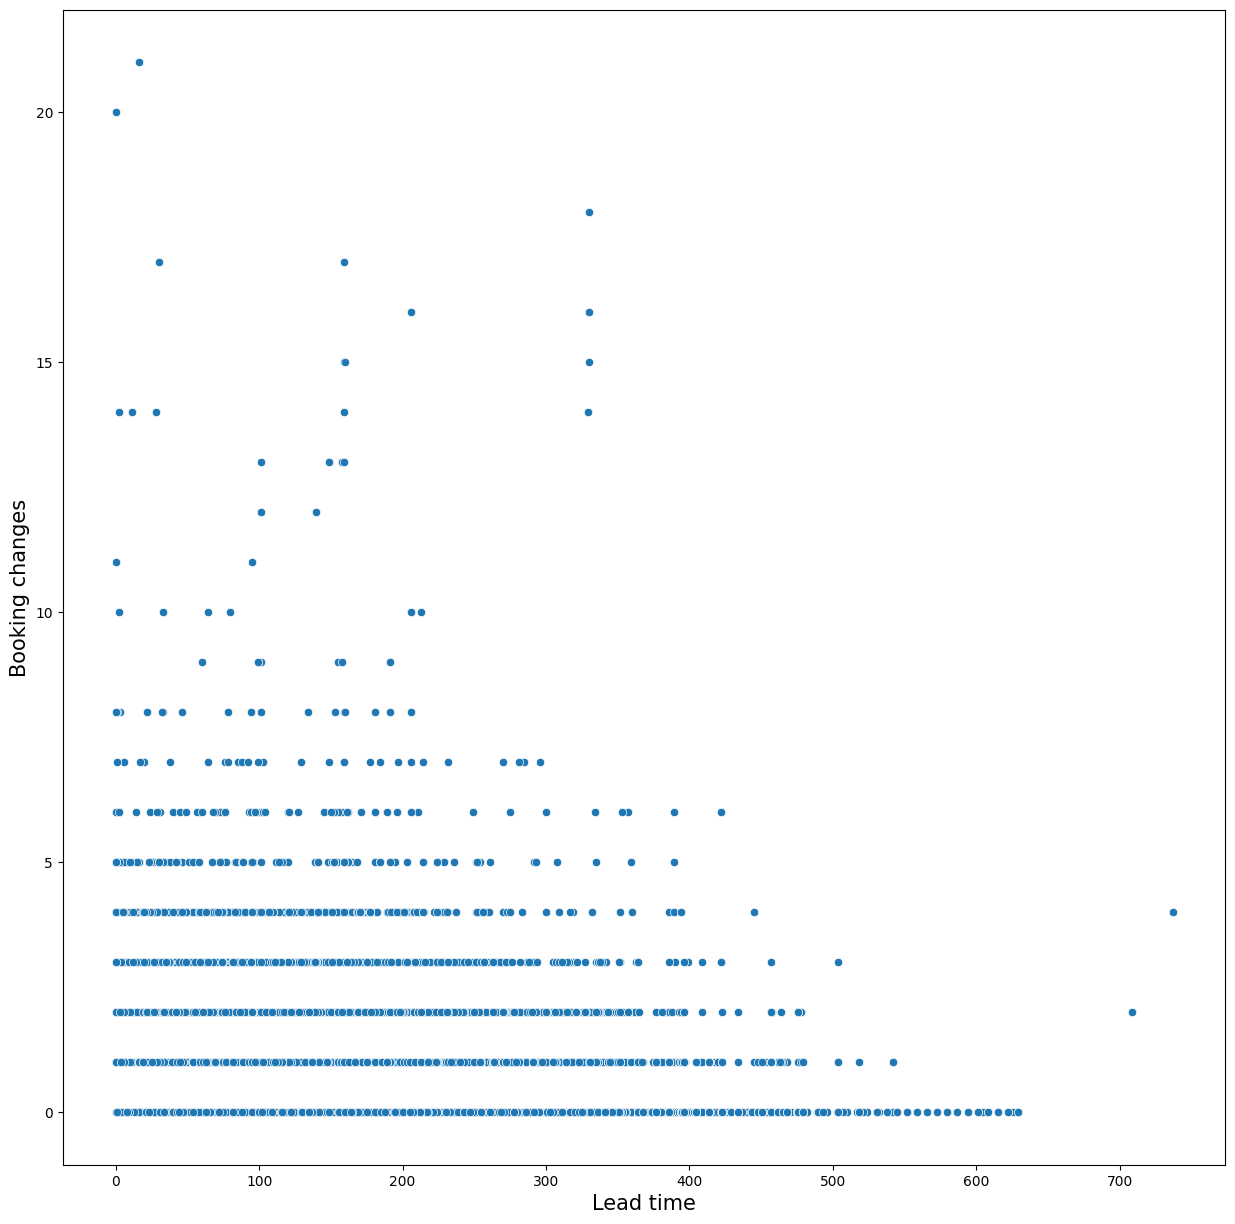

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.scatterplot(data=df, x="lead_time", y="booking_changes")
plt.xlabel('Lead time', size = 15)
plt.ylabel('Booking changes', size = 15)
plt.show()

#### **Kết luận**
**Có thể thấy Lead time và Booking changes có tỉ lệ nghịch với nhau**

#### **Tương quan giữa stays_in_weekend_nights và stays_in_week_nights**  

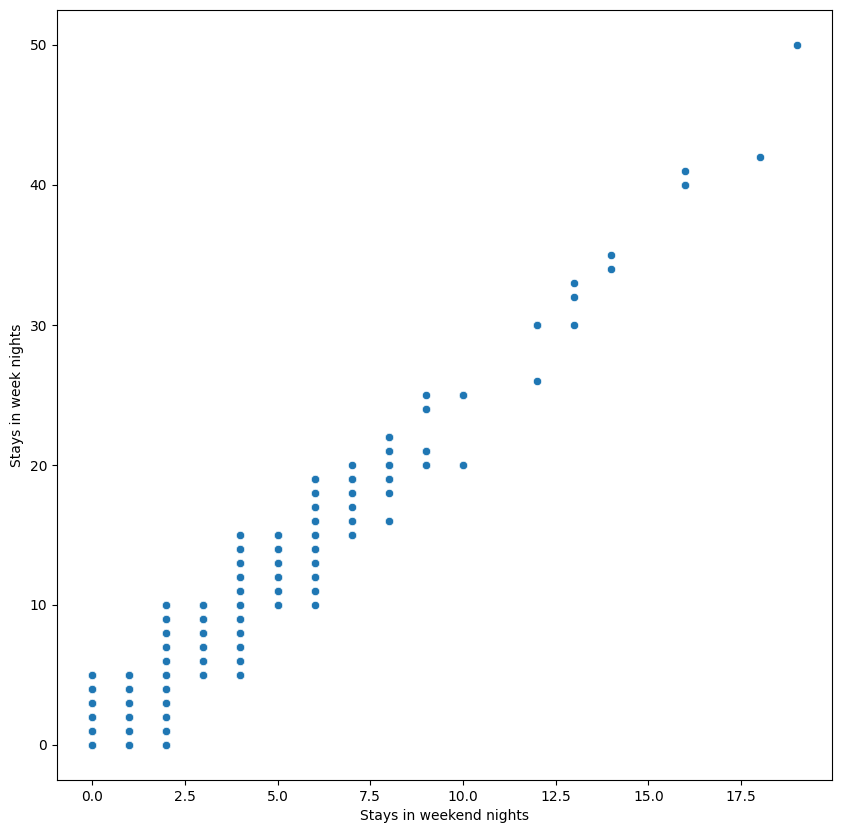

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="stays_in_weekend_nights", y="stays_in_week_nights")
plt.xlabel('Stays in weekend nights')
plt.ylabel('Stays in week nights')
plt.show()

#### **Kết luận**  
**Stays in weekend nights và Stays in week nights tỉ lệ thuận với nhau**

### **3. Sử dụng bar chart để phân tích dữ liệu num và cate** <a class="anchor" id="c33"></a>

#### **Kênh phân phối nào có số lượng đặt phòng cao nhất?**

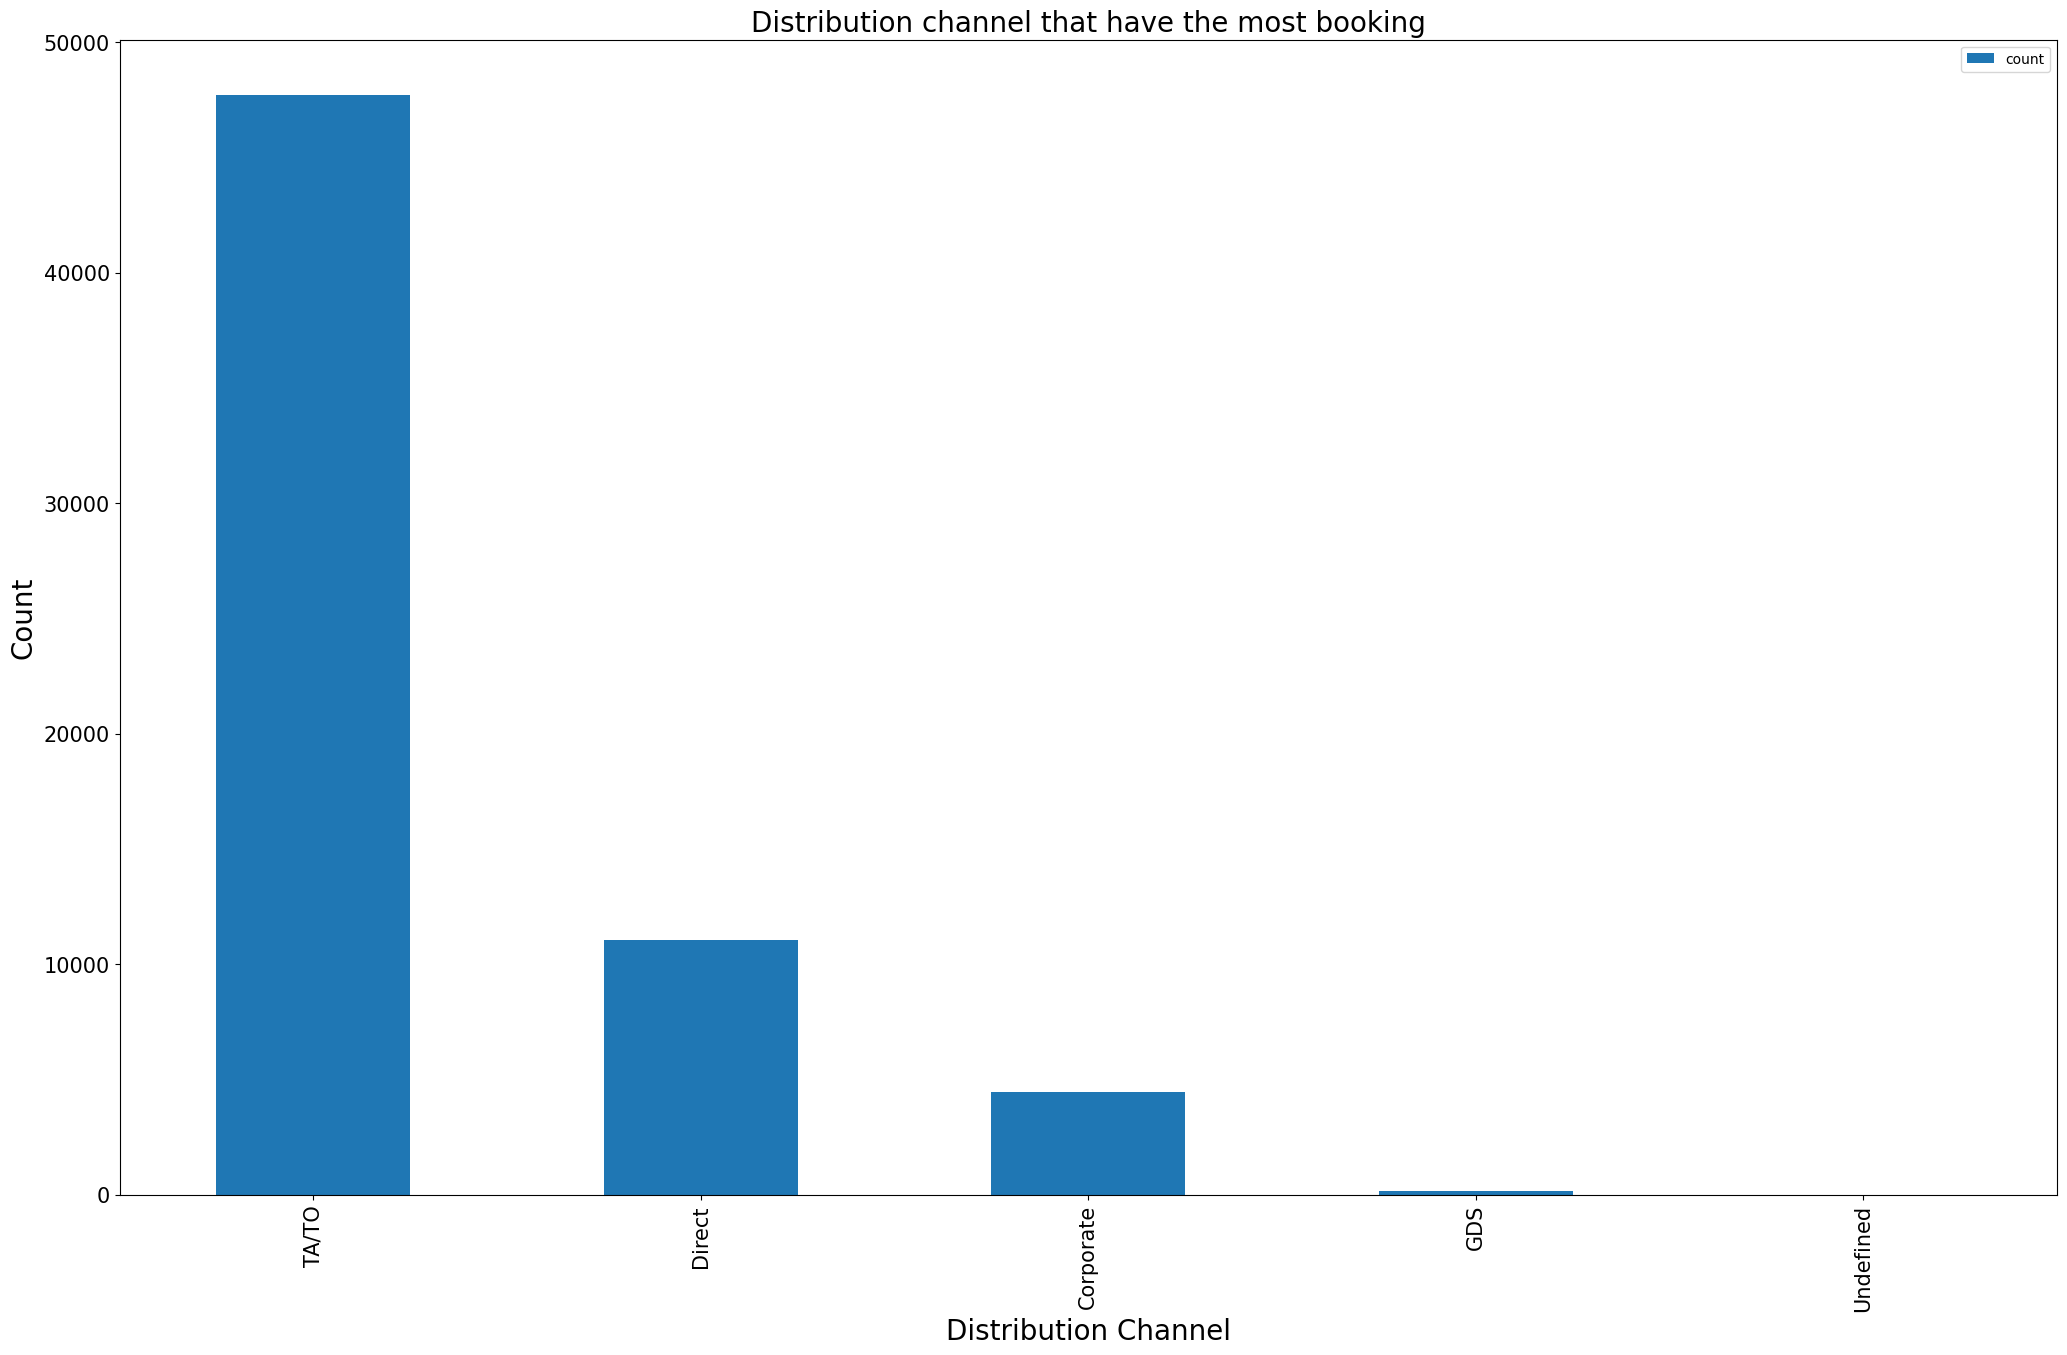

In [25]:
channel_data = pd.DataFrame(df.loc[df['is_canceled'] != 1]['distribution_channel'].value_counts())

# Plot
fig, ax = plt.subplots(figsize=(25, 15))
channel_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Distribution channel that have the most booking", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Distribution Channel", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

plt.show()

#### **Kết luận**
**Có thể thấy kênh phân phối đặt phòng đến từ các Đại lý du lịch hay các nhà điều hành tour chiếm đa số tỉ lệ đặt phòng**

#### **Đa phần các khách hàng lặp lại thường đến từ các nước nào?**

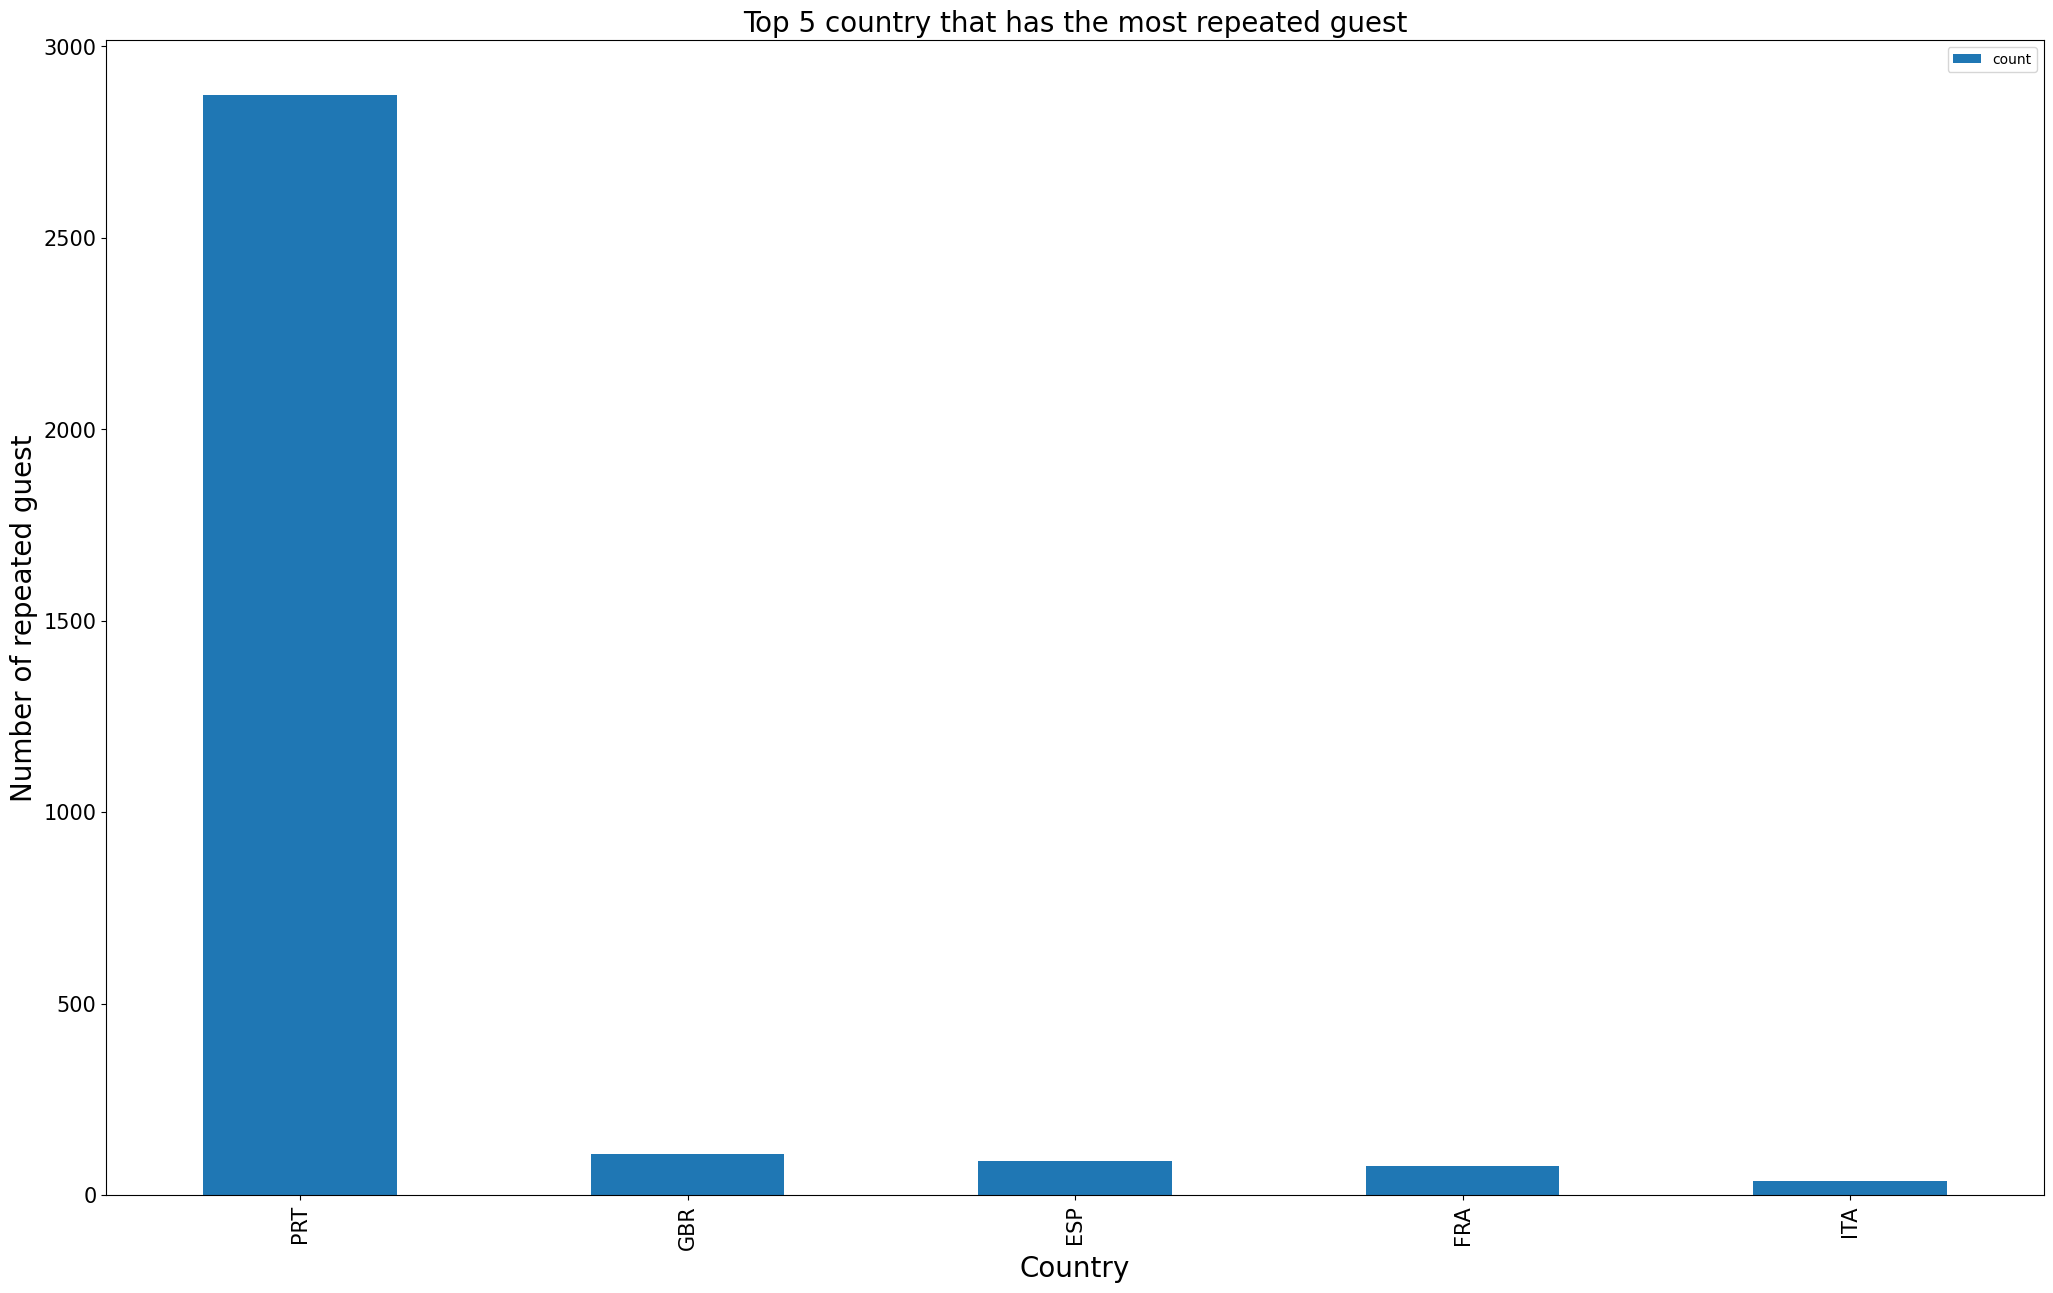

In [26]:
country_data = pd.DataFrame(df.loc[df['is_repeated_guest'] == 1]['country'].value_counts())

# Plot
fig, ax = plt.subplots(figsize=(25, 15))
country_data.head(5).plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Top 5 country that has the most repeated guest", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Country", fontsize=20)
ax.set_ylabel("Number of repeated guest", fontsize=20)

plt.show()

#### **Kết luận**
**Có thể thấy PRT (Bồ Đào Nha) có lượng khách lặp lại nhiều nhất nên ta có thể suy đoán khách sạn đang khảo sát nằm ở Bồ Đào Nha**

#### **Những loại khách hàng của từng khách sạn**

<Axes: xlabel='customer_type', ylabel='count'>

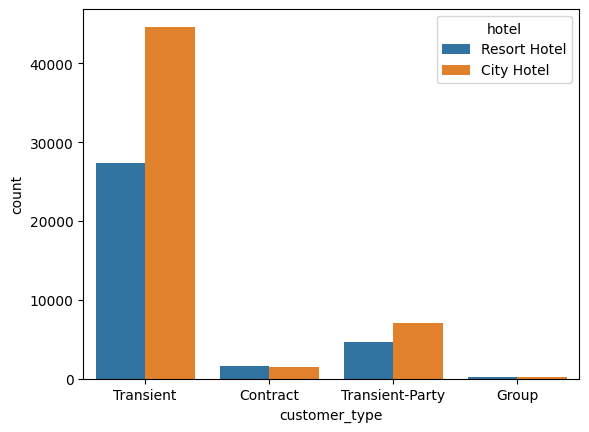

In [27]:
sns.countplot(data=df, x='customer_type', hue='hotel') 

#### **Kết luận**
**Loại khách hàng chiến tỉ lệ đa số là khách hàng riêng lẻ (như khách du lịch) tiếp đến là loại khách hàng đi theo nhóm**

### **4. Tính tỷ trọng đối với hai biến cate** <a class="anchor" id="c34"></a>

In [28]:
df.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                            
                           min         mean      std   max
hotel                                                     
City Hotel                2015 2,016.253968 0.659292  2017
Resort Hotel              2015 2,016.141604 0.720948  2017

In [29]:
df.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(df)

meal
hotel        meal              
City Hotel   BB        0.471749
             FB        0.000126
             HB        0.031935
             SC        0.107522
Resort Hotel BB        0.306067
             FB        0.003993
             HB        0.072017
             SC        0.000961
             Undefined 0.005630

In [30]:
df.groupby([cate_list[0], cate_list[10]]).agg({cate_list[10]: 'count'})/len(df)

reservation_status
hotel        reservation_status                    
City Hotel   Canceled                      0.175077
             Check-Out                     0.427697
             No-Show                       0.008559
Resort Hotel Canceled                      0.088219
             Check-Out                     0.297405
             No-Show                       0.003044

## **IV. EDA 3D** <a class="anchor" id="c4"></a>

### **1. Sử dụng Scatter plot để phân tích dữ liệu 3D cho ba biến num** <a class="anchor" id="c41"></a>

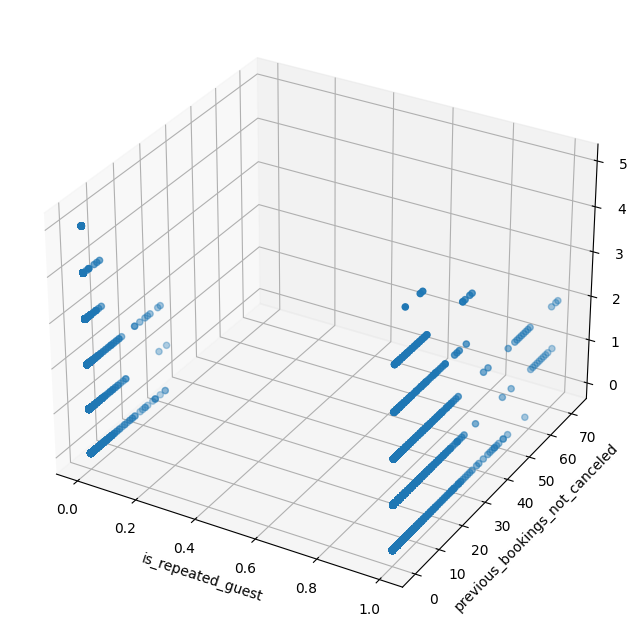

In [31]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df[num_list[10]], df[num_list[12]], df[num_list[19]])
ax.set_xlabel(num_list[10])
ax.set_ylabel(num_list[12])
ax.set_zlabel(num_list[19])
plt.show()

### **2. Sử dụng Scatter plot 2D và màu đối với hai biến num và cate** <a class="anchor" id="c42"></a>

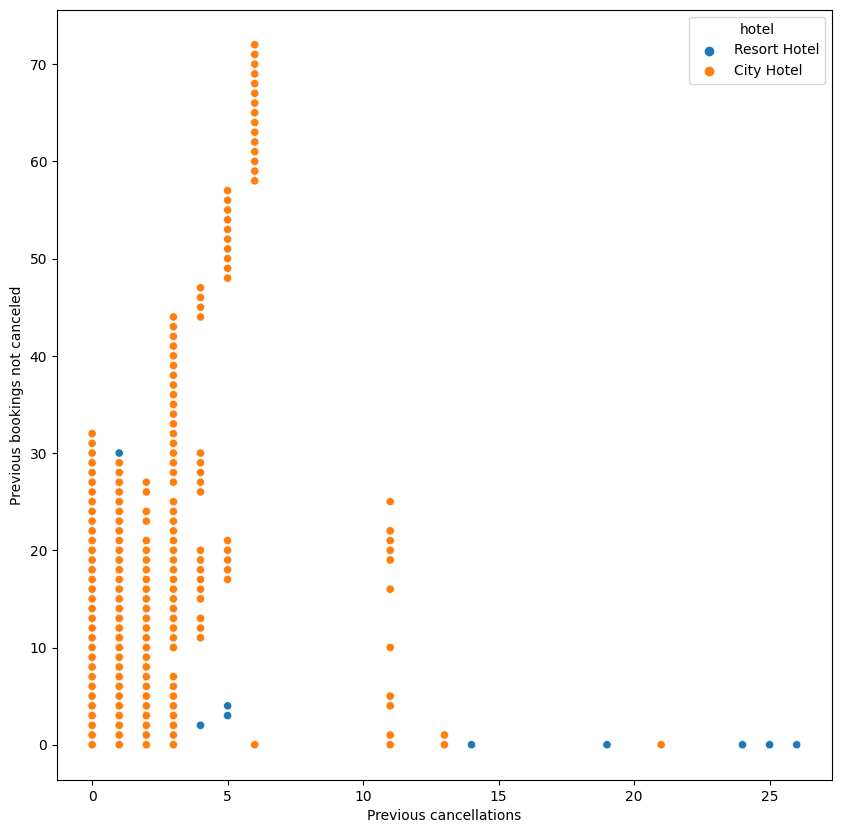

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=df, x="previous_cancellations", y="previous_bookings_not_canceled", hue='hotel')
plt.xlabel('Previous cancellations')
plt.ylabel('Previous bookings not canceled')
plt.show()

**Ta có thể thấy sự khác biệt lớn giữa 2 khách sạn City Hotel và Resort Hotel về số lượng hủy phòng khi lượng hủy phòng của City Hotel cao hơn nhiều so với Resort Hotel**

### **3. Tính tỷ trọng theo bin chia theo thể loại với hai biến cate** <a class="anchor" id="c43"></a>

In [33]:
df.groupby(cate_list[0]).agg({num_list[5]: ['min', 'mean', 'std', 'max'], num_list[6]: ['min', 'mean', 'std', 'max']})

stays_in_weekend_nights                         
                                 min     mean      std max   
hotel                                                        
City Hotel                         0 0.872164 0.913756  16  \
Resort Hotel                       0 1.214614 1.163971  19   

             stays_in_week_nights                        
                              min     mean      std max  
hotel                                                    
City Hotel                      0 2.274444 1.618630  41  
Resort Hotel                    0 3.177402 2.496236  50

## **V. Insight** <a class="anchor" id="c5"></a>

- Lượng hủy phòng trước đó (previous cancellations) của City Hotel cao hơn của Resort Hotel